In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

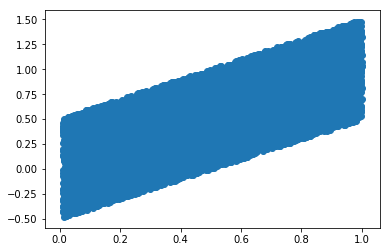

In [2]:
n = 10000
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 1, n)  + np.random.rand(n) - .5


plt.scatter(x,y)

# Assignment 5

## 1. Create and fit a Linear Regression Model
## Calculate the Training error and Testing error using sklearn with a .50 split 
For error, use `mean_squared`, but if you want to experiment with other mean errors, please do!

In [3]:
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
model.coef_, model.intercept_

(array([1.02154345]), -0.011049648754752783)

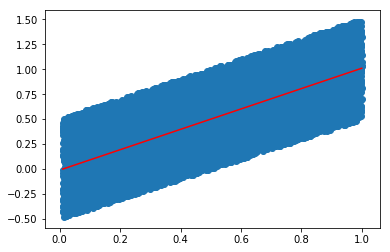

In [5]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_, c="r")

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

In [8]:
model_train = LinearRegression()
model_train.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
model_train.coef_, model_train.intercept_

(array([1.00315799]), -0.0019276375752936836)

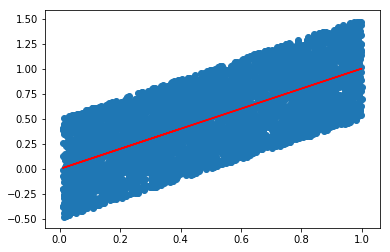

In [10]:
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model_train.coef_) + model_train.intercept_, c="r")

In [11]:
mean_squared_error(y_train, np.dot(x_train, model_train.coef_) + model_train.intercept_)

0.08361978903293325

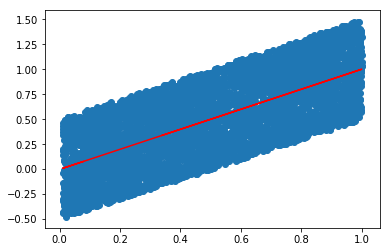

In [12]:
plt.scatter(x_test,y_test)
plt.plot(x_test, np.dot(x_test, model_train.coef_) + model_train.intercept_, c="r")

In [13]:
mean_squared_error(y_test, np.dot(x_test, model_train.coef_) + model_train.intercept_)

0.08516478255209413

## 2.  Repeat #1 for a Ridge Regression

In [14]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([1.00071701]), -0.0006957450563560563)

In [15]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.08517993277949695

In [16]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.08362027757907146

## 3. Vary the `split` size from .01 to .99 with at least 10 values (the more the merrier!). Plot the resulting Training error and Testing error vs. `split` size. Create separate plots for Linear and Ridge

In [32]:
list_of_sizes = [.01, .11, .21, .31, .41, .51, .61, .71, .81, .91]

In [33]:
training_error_list = []
testing_error_list = []
for size in list_of_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=size)
    #making the training model
    model_train = LinearRegression()
    model_train.fit(x_train, y_train)
    model_train.coef_, model_train.intercept_
    #calculate mean squared error for training set
    mse = mean_squared_error(y_train, np.dot(x_train, model_train.coef_) + model_train.intercept_)
    training_error_list.append(mse)
    #calculate mean squared error for testing set
    mse = mean_squared_error(y_test, np.dot(x_test, model_train.coef_) + model_train.intercept_)
    testing_error_list.append(mse)

In [34]:
training_error_list

[0.08445561877929722,
 0.08444761480549275,
 0.08404730837150731,
 0.0847918552704888,
 0.08384490513919325,
 0.08420107558750368,
 0.08508784828851881,
 0.08352999403034062,
 0.0833961451979448,
 0.0843203744254841]

In [35]:
testing_error_list

[0.07537432453204049,
 0.08369813457464544,
 0.08556490219853118,
 0.08341977149290804,
 0.08511353172790834,
 0.08453885337961267,
 0.08392853372137837,
 0.08475358379273354,
 0.08461430324248323,
 0.08441746619273935]

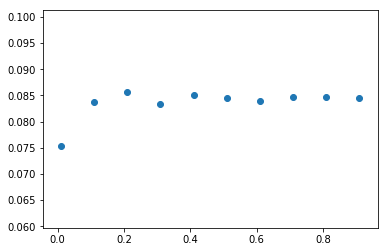

In [37]:
plt.scatter(list_of_sizes, testing_error_list)

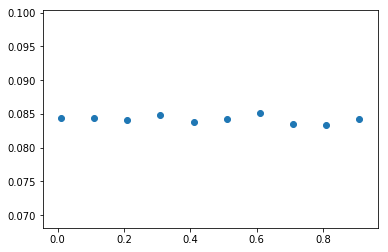

In [38]:
plt.scatter(list_of_sizes, training_error_list)

In [41]:
training_error_list_ridge = []
testing_error_list_ridge = []
for size in list_of_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=size)
    #making the training model
    model_train = Ridge()
    model_train.fit(x_train, y_train)
    model_train.coef_, model_train.intercept_
    #calculate mean squared error for training set
    mse = mean_squared_error(y_train, np.dot(x_train, model_train.coef_) + model_train.intercept_)
    training_error_list_ridge.append(mse)
    #calculate mean squared error for testing set
    mse = mean_squared_error(y_test, np.dot(x_test, model_train.coef_) + model_train.intercept_)
    testing_error_list_ridge.append(mse)

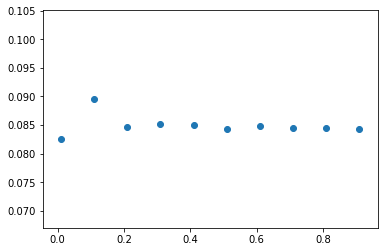

In [42]:
plt.scatter(list_of_sizes, testing_error_list_ridge)

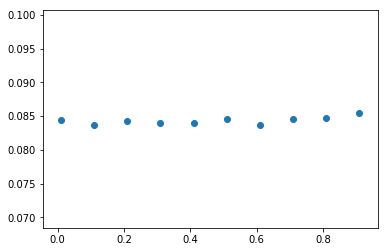

In [43]:
plt.scatter(list_of_sizes, training_error_list_ridge)

## 4. Chose an ideal split size based on the previous plot for Ridge.
## Vary the Ridge parameter `alpha` from 0 to any value you'd like above 1. Plot the Train and Test error. Describe what you see based on the `alpha` parameter's stiffness.

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.6)

In [50]:
alpha_list = [0, .5, 1, 3, 5, 7, 9, 12, 15]
training_error_list_ridge = []
testing_error_list_ridge = []
for alpha_value in alpha_list:
    #making the training model
    model_train = Ridge(alpha = alpha_value)
    model_train.fit(x_train, y_train)
    model_train.coef_, model_train.intercept_
    #calculate mean squared error for training set
    mse = mean_squared_error(y_train, np.dot(x_train, model_train.coef_) + model_train.intercept_)
    training_error_list_ridge.append(mse)
    #calculate mean squared error for testing set
    mse = mean_squared_error(y_test, np.dot(x_test, model_train.coef_) + model_train.intercept_)
    testing_error_list_ridge.append(mse)

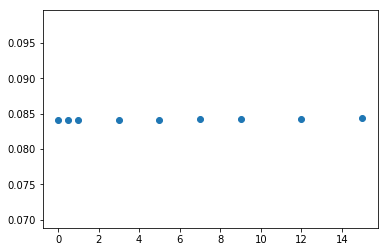

In [51]:
plt.scatter(alpha_list, testing_error_list_ridge)

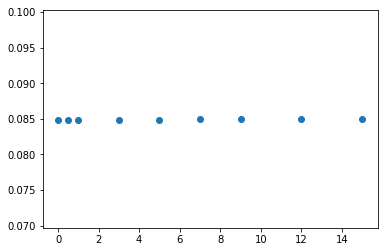

In [52]:
plt.scatter(alpha_list, training_error_list_ridge)

Varying the alpha value does not have much of an impact on the error. The higher the alpha value is, the mean squared error remains about the same. 

## Bonus. Either: Generate data  with a polynomial shape or use real data that you find on your own. Choose whatever regression model and process you'd like (Ridge, polynomial, etc.) and plot the Train-Test errors vs. any parameter your Model depends on (e.g. `alpha`, `degree`, etc.)